# Programming & Visualization

| **Item**            | **Details**              |
|----------------------|--------------------------|
| Deadline             | 3 oktober, 13:30u        |
| Data                 | olympics_prepared.csv  |
| Aantal vragen        | 4                        |
| Aantal pagina’s      | 4                        |
| Author               | Adil Vural                        |

## Q1 Descriptives

In [25]:
#inlezen van de dataset Olympics

df=pd.read_csv('olympics_prepared.csv')
df.columns

Index(['game', 'game_season', 'game_year', 'game_location', 'country_name',
       'country_code', 'continent', 'language', 'religion', 'landmass',
       'population', 'gdp', 'flag_nr_colors', 'flag_mainhue',
       'flag_topleft_color', 'flag_botright_color', 'gold', 'silver',
       'bronze'],
      dtype='object')

## Data

In deze assignment maken we gebruik van een dataset over de Olympische Spelen, 
1960-2022. De dataset bestaat uit de 1.357 observaties met de volgende 19 variabelen:

| **Kolom**              | **Beschrijving**                               |
|-------------------------|-----------------------------------------------|
| game                   | Naam van Olympische Spelen (combi locatie en jaar) |
| game_season            | Winter- of Zomerspelen                        |
| game_year              | Jaartal                                       |
| game_location          | Organiserend land                             |
| country_name           | Deelnemend land                               |
| country_code           | Landcode (van deelnemend land)                 |
| continent              | Continent (“”)                                |
| language               | Meest gesproken taal (“”)                     |
| religion               | Dominante religie (“”)                        |
| area                   | Grootte (“”)                                  |
| population             | Aantal inwoners                               |
| gdp                    | Gross Domestic Product                        |
| flag_nr_colors         | Aantal kleuren in de vlag                     |
| flag_mainhue           | Hoofdkleur van de vlag                        |
| flag_topleft_color     | Kleur linkerbovenhoek van de vlag             |
| flag_botright_color    | Kleur rechterbenedenhoek van de vlag          |
| gold                   | Aantal gouden medailles                       |
| silver                 | Aantal zilveren medailles                     |
| bronze                 | Aantal bronzen medailles                      |


Ieder observatie is een land, met karakteristieken over dat land en over de deelname 
aan de desbetreffende Olympische Spelen. Hieronder volgt een viertal vragen over deze 
dataset die met Python kunnen worden beantwoord.

### Descriptives a.
Lees de data in vanuit het .csv-bestand (pd.read_csv()). Maak gebruik van eenvoudige descriptieve functions om een
eerste beeld te krijgen van de beschikbare data. Zeg in het bijzonder iets (in tekst en laat
zien welke code je hebt gebruikt om tot deze bevindingen te komen) over de volgende
variabelen:
1. country_name
2. continent
3. gold, silver, bronze


In [18]:
# Unieke landen
aantal_landen = df["country_name"].nunique()
print(f"Aantal unieke landen: {aantal_landen}")


Aantal unieke landen: 150


In [19]:
# Volledig lege rijen
aantal_lege_rijen = df.isnull().all(axis=1).sum()
print(f"Aantal volledig lege rijen: {aantal_lege_rijen}")


Aantal volledig lege rijen: 0


In [20]:
# Missende waarden per kolom
print("\nAantal missende waarden per kolom:")
print(df.isnull().sum())




Aantal missende waarden per kolom:
game                     0
game_season              0
game_year                0
game_location            0
country_name             0
country_code           221
continent              454
language               454
religion               454
landmass               596
population             178
gdp                    268
flag_nr_colors         454
flag_mainhue           454
flag_topleft_color     454
flag_botright_color    454
gold                     0
silver                   0
bronze                   0
total_medals             0
dtype: int64


In [21]:
# Percentage missende waarden per kolom
print("\nPercentage missende waarden per kolom:")
print((df.isnull().mean() * 100).round(2))



Percentage missende waarden per kolom:
game                    0.00
game_season             0.00
game_year               0.00
game_location           0.00
country_name            0.00
country_code           16.29
continent              33.46
language               33.46
religion               33.46
landmass               43.92
population             13.12
gdp                    19.75
flag_nr_colors         33.46
flag_mainhue           33.46
flag_topleft_color     33.46
flag_botright_color    33.46
gold                    0.00
silver                  0.00
bronze                  0.00
total_medals            0.00
dtype: float64


In [22]:
# Basisstatistieken voor medailles
print("\nBasisstatistieken voor medailles (gold, silver, bronze):")
print(df[["gold", "silver", "bronze"]].describe())



Basisstatistieken voor medailles (gold, silver, bronze):
              gold       silver       bronze
count  1357.000000  1357.000000  1357.000000
mean      3.663965     3.648489     3.984525
std       7.417231     6.156114     5.980590
min       0.000000     0.000000     0.000000
25%       0.000000     1.000000     1.000000
50%       1.000000     2.000000     2.000000
75%       4.000000     4.000000     5.000000
max      82.000000    69.000000    46.000000


In [ ]:

# Totale medailles per land + top 10
df["total_medals"] = df["gold"] + df["silver"] + df["bronze"]
top10 = df[["country_name", "total_medals"]].sort_values(by="total_medals", ascending=False).head(10)
print("\nTop 10 landen met meeste medailles:")
print(top10.to_string(index=False))



Top 10 landen met meeste medailles:
                        country_name  total_medals
                        Soviet Union           195
                       United States           173
                        Soviet Union           131
German Democratic Republic (Germany)           126
                        Soviet Union           125
                       United States           121
                       United States           113
                       United States           112
                        Unified Team           112
                       United States           108


In [27]:

# Stap 2: Bekijk de eerste paar rijen van de dataset
print(df.head())
# Stap 3: Krijg een overzicht van de dataset
print(df.info())
# Stap 4: Beschrijving van specifieke variabelen
# a. country_name
print(df['country_name'].unique())  # Lijst van unieke landen
print(df['country_name'].value_counts())  # Aantal medailles per land
# b. continent
print(df['continent'].unique())  # Lijst van unieke continenten
print(df['continent'].value_counts())  # Aantal medailles per continent
# c. goud, zilver, brons
print(df[['gold', 'silver', 'bronze']].describe())  # Statistische beschrijving
print(df[['gold', 'silver', 'bronze']].sum())  # Totaal aantal medailles

                game game_season  game_year  game_location    country_name  \
0  squaw-valley-1960      Winter       1960  United States         Austria   
1  squaw-valley-1960      Winter       1960  United States          Canada   
2  squaw-valley-1960      Winter       1960  United States  Czechoslovakia   
3  squaw-valley-1960      Winter       1960  United States         Finland   
4  squaw-valley-1960      Winter       1960  United States          France   

  country_code  continent language   religion   landmass  population  \
0          AUT       84.0   German  Christian     Europe   7047274.0   
1          CAN     9976.0  English  Christian  N.America  17898792.0   
2          NaN      128.0    Other      Other     Europe         NaN   
3          FIN      337.0    Other  Christian     Europe   4429631.0   
4          FRA      547.0   French  Christian     Europe  46428136.0   

            gdp  flag_nr_colors flag_mainhue flag_topleft_color  \
0  6.650134e+09             2.0

### Descriptives b


Filter uit de dataset de top-10 landen (volgens de traditionele medaillespiegel) van
2022 en toon deze medaillespiegel (met alleen naam van het land en aantal gouden,
zilveren en bronzen medailles)  

Traditionele medailespiegel: Eerst de landen met de meeste gouden medailles, dan de landen met de meeste zilveren medailles en 
vervolgens de landen met de meeste bronzen medailles

In [28]:
# Aantal rijen met minstens één lege waarde
aantal_rijen_met_leeg = df.isnull().any(axis=1).sum()
print("Aantal rijen met minstens één lege waarde:", aantal_rijen_met_leeg)

Aantal rijen met minstens één lege waarde: 686


In [29]:
# Waardeverdeling (hoe vaak komt elke waarde voor)
df['continent'].value_counts()

continent
41.0     64
337.0    33
547.0    33
301.0    33
450.0    33
         ..
57.0      1
9.0       1
268.0     1
109.0     1
196.0     1
Name: count, Length: 79, dtype: int64

In [30]:
# Gemiddelde, minimum, maximum van medailles
df[['gold', 'silver', 'bronze']].mean()
df[['gold', 'silver', 'bronze']].min()
df[['gold', 'silver', 'bronze']].max()

gold      82
silver    69
bronze    46
dtype: int64

In [31]:
# Filter de data voor de Olympische Spelen van 2022
df_2022=df[df['game_year']==2022]

In [33]:
 #Sorteer volgens de traditionele medaillespiegel: eerst gold, dan silver, dan bronze
 top_10=df_2022.sort_values(by=['gold', 'silver', 'bronze'], ascending=False).head(10)
 

In [34]:
# De naam van het land en het aantal medailles
print(top_10[['country_name', 'gold', 'silver', 'bronze']])

       country_name  gold  silver  bronze
1345         Norway    16       8      13
1338        Germany    12      10       5
1333          China     9       4       2
1356  United States     8      10       7
1352         Sweden     8       5       5
1343    Netherlands     8       5       4
1329        Austria     7       7       4
1353    Switzerland     7       2       5
1348         Russia     6      12      14
1337         France     5       7       2


## Q2 - Wrangling

### Wrangling A

Voeg de volgende variabelen toe aan de dataset:
1. medals - totaal aantal medailles (van het deelnemende land tijdens de 
desbetreffende Olympische Spelen)
2. gdp_per_capita - GDP per inwoner (“”)
3. gdp_per_medal - GDP per medaille (“”)
4. pop_per_medal - aantal inwoners per medaille (“”)



In [37]:
#Totaal aantal medailles
df['Totaal_medals']=df['gold']+ df['silver']+ df['bronze']
print(df[['Totaal_medals','gold','silver','bronze' ]].sum())    

Totaal_medals    15330
gold              4972
silver            4951
bronze            5407
dtype: int64


In [38]:
# 2. GDP (gross domestic product) per inwoner
df['gdp_per_capita']=df['gdp']/df['population']
df[['gdp_per_capita','gdp','population']].describe()

,gdp_per_capita,gdp,population
count,1073.000000,1.089000e+03,1.179000e+03
mean,16345.688473,7.553038e+11,6.531847e+07
std,19706.169257,2.218629e+12,1.919995e+08
min,75.339627,2.221006e+08,2.361000e+04
25%,2127.316455,2.304157e+10,5.404736e+06
50%,7707.885239,1.125325e+11,1.334278e+07
75%,24887.749029,4.614871e+11,5.148499e+07
max,175396.930887,2.574411e+13,1.426106e+09


In [40]:
# 3. GDP per medaille
df['gdp_per_medal'] = df['gdp'] / df['Totaal_medals']
df[['gdp_per_medal', 'gdp', 'Totaal_medals']].describe() 


,gdp_per_medal,gdp,Totaal_medals
count,1.089000e+03,1.089000e+03,1357.000000
mean,9.435447e+10,7.553038e+11,11.296979
std,2.708248e+11,2.218629e+12,18.819969
min,1.336748e+08,2.221006e+08,1.000000
25%,6.631729e+09,2.304157e+10,2.000000
50%,2.369343e+10,1.125325e+11,5.000000
75%,7.240009e+10,4.614871e+11,13.000000
max,4.601663e+12,2.574411e+13,195.000000


In [70]:
# 4. Aantal inwoners per medaille
df['pop_per_medal'] = df['population'] / df['Totaal_medals']
df

,game,game_season,game_year,game_location,country_name,country_code,continent,language,religion,landmass,...,flag_topleft_color,flag_botright_color,gold,silver,bronze,Total_medals,gdp_per_capita,Totaal_medals,gdp_per_medal,pop_per_medal
0,squaw-valley-1960,Winter,1960,United States,Austria,AUT,84.0,German,Christian,Europe,...,red,red,1,2,3,6,943.646283,6,1.108356e+09,1.174546e+06
1,squaw-valley-1960,Winter,1960,United States,Canada,CAN,9976.0,English,Christian,N.America,...,red,red,2,1,1,4,2266.285286,4,1.014094e+10,4.474698e+06
2,squaw-valley-1960,Winter,1960,United States,Czechoslovakia,NaN,128.0,Other,Other,Europe,...,white,red,0,1,0,1,NaN,1,NaN,NaN
3,squaw-valley-1960,Winter,1960,United States,Finland,FIN,337.0,Other,Christian,Europe,...,white,white,2,3,3,8,1191.749688,8,6.598764e+08,5.537039e+05
4,squaw-valley-1960,Winter,1960,United States,France,FRA,547.0,French,Christian,Europe,...,blue,red,1,0,2,3,1340.253634,3,2.074183e+10,1.547605e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,beijing-2022,Winter,2022,China,Sweden,SWE,450.0,Other,Christian,Europe,...,blue,blue,8,5,5,18,56297.401346,18,3.280053e+10,5.826296e+05
1353,beijing-2022,Winter,2022,China,Switzerland,CHE,41.0,German,Christian,Europe,...,red,red,7,2,5,14,93085.736439,14,5.845904e+10,6.280129e+05
1354,beijing-2022,Winter,2022,China,Ukraine,UKR,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,1,3946.270072,1,1.619895e+11,4.104877e+07
1355,beijing-2022,Winter,2022,China,United Kingdom,GBR,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,0,2,45304.646482,2,1.544420e+12,3.408966e+07


In [71]:
### Wrangling B

#Welke landen hebben over alle Winterspelen samen meer dan 250 medailles behaald? Rangschik deze landen op basis van hun totale aantal medailles in aflopende volgorde.

In [85]:
# Filter alleen de Winterspelen
winter_df = df[df['game_season'] == 'Winter']
df

,game,game_season,game_year,game_location,country_name,country_code,continent,language,religion,landmass,...,flag_topleft_color,flag_botright_color,gold,silver,bronze,Total_medals,gdp_per_capita,Totaal_medals,gdp_per_medal,pop_per_medal
0,squaw-valley-1960,Winter,1960,United States,Austria,AUT,84.0,German,Christian,Europe,...,red,red,1,2,3,6,943.646283,6,1.108356e+09,1.174546e+06
1,squaw-valley-1960,Winter,1960,United States,Canada,CAN,9976.0,English,Christian,N.America,...,red,red,2,1,1,4,2266.285286,4,1.014094e+10,4.474698e+06
2,squaw-valley-1960,Winter,1960,United States,Czechoslovakia,NaN,128.0,Other,Other,Europe,...,white,red,0,1,0,1,NaN,1,NaN,NaN
3,squaw-valley-1960,Winter,1960,United States,Finland,FIN,337.0,Other,Christian,Europe,...,white,white,2,3,3,8,1191.749688,8,6.598764e+08,5.537039e+05
4,squaw-valley-1960,Winter,1960,United States,France,FRA,547.0,French,Christian,Europe,...,blue,red,1,0,2,3,1340.253634,3,2.074183e+10,1.547605e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,beijing-2022,Winter,2022,China,Sweden,SWE,450.0,Other,Christian,Europe,...,blue,blue,8,5,5,18,56297.401346,18,3.280053e+10,5.826296e+05
1353,beijing-2022,Winter,2022,China,Switzerland,CHE,41.0,German,Christian,Europe,...,red,red,7,2,5,14,93085.736439,14,5.845904e+10,6.280129e+05
1354,beijing-2022,Winter,2022,China,Ukraine,UKR,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,1,3946.270072,1,1.619895e+11,4.104877e+07
1355,beijing-2022,Winter,2022,China,United Kingdom,GBR,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,0,2,45304.646482,2,1.544420e+12,3.408966e+07


In [89]:
#Totaal aantal medailles per land in de Winterspelen
df_winter_medals = winter_df.groupby('country_name')['Totaal_medals'].sum().reset_index()
df_winter_medals = df_winter_medals.sort_values(by='Totaal_medals', ascending=False)
df_winter_medals

,country_name,Totaal_medals
27,Norway,317
43,United States,275
17,Germany,268
1,Austria,210
5,Canada,207
36,Soviet Union,177
25,Netherlands,144
39,Switzerland,141
19,Italy,135
38,Sweden,135


In [ ]:
# Selecteer landen met meer dan 250 medailles
#op_landen = medailles_per_land[medailles_per_land > 250]
#top_landen = df.'Totaal_medals' > 250
df


NameError: name 'medailles_per_land' is not defined

In [104]:
# Visualisatie opdracht

In [105]:
#filteren op 2022 data
df_2022

,game,game_season,game_year,game_location,country_name,country_code,continent,language,religion,landmass,...,flag_topleft_color,flag_botright_color,gold,silver,bronze,Total_medals,gdp_per_capita,Totaal_medals,gdp_per_medal,pop_per_medal
1328,beijing-2022,Winter,2022,China,Australia,AUS,7690.0,English,Christian,Oceania,...,white,blue,1,2,1,4,64614.231779,4,4.232392e+11,6.550247e+06
1329,beijing-2022,Winter,2022,China,Austria,AUT,84.0,German,Christian,Europe,...,red,red,7,7,4,18,51953.513936,18,2.616344e+10,5.035933e+05
1330,beijing-2022,Winter,2022,China,Belarus,BLR,NaN,NaN,NaN,NaN,...,NaN,NaN,0,2,0,2,8042.433413,2,3.688759e+10,4.586620e+06
1331,beijing-2022,Winter,2022,China,Belgium,BEL,31.0,Other,Christian,Europe,...,black,red,1,0,1,2,50130.850068,2,2.918070e+11,5.820906e+06
1332,beijing-2022,Winter,2022,China,Canada,CAN,9976.0,English,Christian,N.America,...,red,red,4,8,14,26,55677.826259,26,8.313398e+10,1.493125e+06
1333,beijing-2022,Winter,2022,China,China,CHN,9561.0,Chinese,Other,NaN,...,red,red,9,4,2,15,12547.038888,15,1.192119e+12,9.501197e+07
1334,beijing-2022,Winter,2022,China,Czech Republic,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,1,2,NaN,2,NaN,NaN
1335,beijing-2022,Winter,2022,China,Estonia,EST,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,1,28088.071688,1,3.792148e+10,1.350092e+06
1336,beijing-2022,Winter,2022,China,Finland,FIN,337.0,Other,Christian,Europe,...,white,white,2,2,4,8,50614.526316,8,3.523593e+10,6.961624e+05
1337,beijing-2022,Winter,2022,China,France,FRA,547.0,French,Christian,Europe,...,blue,red,5,7,2,14,41931.212349,14,1.985066e+11,4.734101e+06


In [111]:
# 1. Bereken per land het gemiddelde, maximum en minimum aantal medailles
medaille_stats = df.groupby('country_name')['Totaal_medals'].agg(['mean', 'max', 'min']).reset_index()
df

,game,game_season,game_year,game_location,country_name,country_code,continent,language,religion,landmass,...,flag_topleft_color,flag_botright_color,gold,silver,bronze,Total_medals,gdp_per_capita,Totaal_medals,gdp_per_medal,pop_per_medal
0,squaw-valley-1960,Winter,1960,United States,Austria,AUT,84.0,German,Christian,Europe,...,red,red,1,2,3,6,943.646283,6,1.108356e+09,1.174546e+06
1,squaw-valley-1960,Winter,1960,United States,Canada,CAN,9976.0,English,Christian,N.America,...,red,red,2,1,1,4,2266.285286,4,1.014094e+10,4.474698e+06
2,squaw-valley-1960,Winter,1960,United States,Czechoslovakia,NaN,128.0,Other,Other,Europe,...,white,red,0,1,0,1,NaN,1,NaN,NaN
3,squaw-valley-1960,Winter,1960,United States,Finland,FIN,337.0,Other,Christian,Europe,...,white,white,2,3,3,8,1191.749688,8,6.598764e+08,5.537039e+05
4,squaw-valley-1960,Winter,1960,United States,France,FRA,547.0,French,Christian,Europe,...,blue,red,1,0,2,3,1340.253634,3,2.074183e+10,1.547605e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,beijing-2022,Winter,2022,China,Sweden,SWE,450.0,Other,Christian,Europe,...,blue,blue,8,5,5,18,56297.401346,18,3.280053e+10,5.826296e+05
1353,beijing-2022,Winter,2022,China,Switzerland,CHE,41.0,German,Christian,Europe,...,red,red,7,2,5,14,93085.736439,14,5.845904e+10,6.280129e+05
1354,beijing-2022,Winter,2022,China,Ukraine,UKR,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,1,3946.270072,1,1.619895e+11,4.104877e+07
1355,beijing-2022,Winter,2022,China,United Kingdom,GBR,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,0,2,45304.646482,2,1.544420e+12,3.408966e+07


In [114]:

# 2. Kies de top 10 landen op basis van het gemiddelde
top10 = medaille_stats.sort_values(by='mean', ascending=False).head(10)
df

,game,game_season,game_year,game_location,country_name,country_code,continent,language,religion,landmass,...,flag_topleft_color,flag_botright_color,gold,silver,bronze,Total_medals,gdp_per_capita,Totaal_medals,gdp_per_medal,pop_per_medal
0,squaw-valley-1960,Winter,1960,United States,Austria,AUT,84.0,German,Christian,Europe,...,red,red,1,2,3,6,943.646283,6,1.108356e+09,1.174546e+06
1,squaw-valley-1960,Winter,1960,United States,Canada,CAN,9976.0,English,Christian,N.America,...,red,red,2,1,1,4,2266.285286,4,1.014094e+10,4.474698e+06
2,squaw-valley-1960,Winter,1960,United States,Czechoslovakia,NaN,128.0,Other,Other,Europe,...,white,red,0,1,0,1,NaN,1,NaN,NaN
3,squaw-valley-1960,Winter,1960,United States,Finland,FIN,337.0,Other,Christian,Europe,...,white,white,2,3,3,8,1191.749688,8,6.598764e+08,5.537039e+05
4,squaw-valley-1960,Winter,1960,United States,France,FRA,547.0,French,Christian,Europe,...,blue,red,1,0,2,3,1340.253634,3,2.074183e+10,1.547605e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,beijing-2022,Winter,2022,China,Sweden,SWE,450.0,Other,Christian,Europe,...,blue,blue,8,5,5,18,56297.401346,18,3.280053e+10,5.826296e+05
1353,beijing-2022,Winter,2022,China,Switzerland,CHE,41.0,German,Christian,Europe,...,red,red,7,2,5,14,93085.736439,14,5.845904e+10,6.280129e+05
1354,beijing-2022,Winter,2022,China,Ukraine,UKR,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,1,3946.270072,1,1.619895e+11,4.104877e+07
1355,beijing-2022,Winter,2022,China,United Kingdom,GBR,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,0,2,45304.646482,2,1.544420e+12,3.408966e+07


C:\Users\Oktay\AppData\Local\Temp\ipykernel_25644\4137749710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Oktay\AppData\Local\Temp\ipykernel_25644\4137749710.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


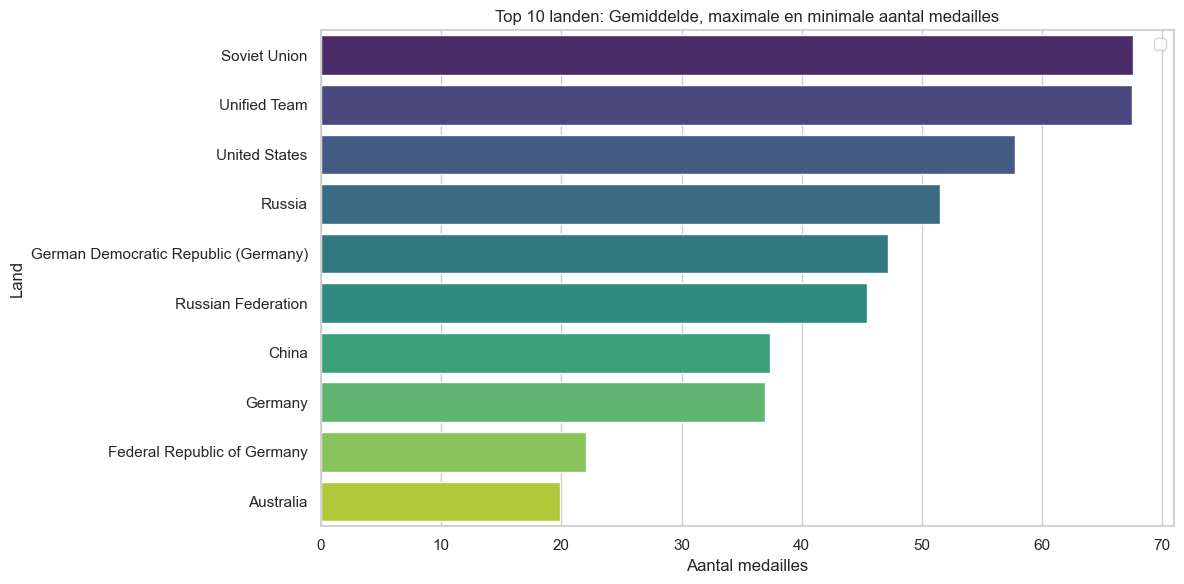

In [138]:
# 3. Maak een barplot voor het gemiddelde
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    y='country_name',
    x='mean',
    palette='viridis'
   
)
plt.title('Top 10 landen: Gemiddelde, maximale en minimale aantal medailles')
plt.ylabel('Land')
plt.xlabel('Aantal medailles')
plt.legend()
plt.tight_layout()
plt.show()
#plt.scatter(top10['country_name'], top10['max'], color='green', )
#plt.scatter(top10['mean'], top10['min'], color='red', )

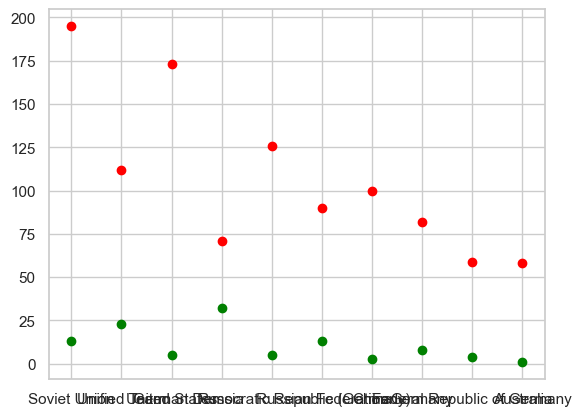

In [121]:
# Voeg scatterplots toe voor max (rood) en min (groen)
plt.scatter(top10['country_name'], top10['max'], color='red', label='Maximaal')
plt.scatter(top10['country_name'], top10['min'], color='green', label='Minimaal')
